In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

GenGB2021 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_GB_20210101-20211231.csv")

GenGB2021 = GenGB2021.replace('n/e', np.NaN)
GenGB2021 = GenGB2021.replace('N/A', np.NaN)

GenGB2021 = pd.DataFrame({'Date': GenGB2021.iloc[:,1],
                          'SP': GenGB2021.iloc[:,2],
                          'Wind [MW]': GenGB2021.iloc[:,7],
                          'PSH [MW]': GenGB2021.iloc[:,8],
                          'Hydro [MW]': GenGB2021.iloc[:,9]})

print(GenGB2021.to_string())

           Date  SP  Wind [MW]  PSH [MW]  Hydro [MW]
0      20210101   1       4489         0         383
1      20210101   2       4351         0         379
2      20210101   3       4258         0         349
3      20210101   4       4265         0         334
4      20210101   5       4365         0         328
5      20210101   6       4466         0         327
6      20210101   7       4404         0         320
7      20210101   8       4404         0         315
8      20210101   9       4524         0         315
9      20210101  10       4551         0         315
10     20210101  11       4731         0         314
11     20210101  12       4705         0         314
12     20210101  13       4625         0         320
13     20210101  14       4662         0         343
14     20210101  15       4759         0         388
15     20210101  16       4759         0         389
16     20210101  17       4853         0         402
17     20210101  18       4966         0      

In [92]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(GenGB2021.iloc[:,0])):
        if i < 86:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2021.iloc[start,0]
            opWi = sum(GenGB2021.iloc[start:end,2])/2
            opPS = sum(GenGB2021.iloc[start:end,3])/2
            opHy = sum(GenGB2021.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
        elif i == 86: # For some reason this day does not show in the DataFrame
            start = 48*i
            end = 4174
            day = GenGB2021.iloc[start,0]
            opWi = sum(GenGB2021.iloc[start:end,2])/2
            opPS = sum(GenGB2021.iloc[start:end,3])/2
            opHy = sum(GenGB2021.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
        elif 87 <= i < 303:
            start = 48*i-2
            end = 48*(i+1)-2
            day = GenGB2021.iloc[start,0]
            opWi = sum(GenGB2021.iloc[start:end,2])/2
            opPS = sum(GenGB2021.iloc[start:end,3])/2
            opHy = sum(GenGB2021.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
        elif i == 303:
            start = 48*i
            end = 14592
            day = GenGB2021.iloc[start,0]
            opWi = sum(GenGB2021.iloc[start:end,2])/2
            opPS = sum(GenGB2021.iloc[start:end,3])/2
            opHy = sum(GenGB2021.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
        elif 304 <= i < 365:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2021.iloc[start,0]
            opWi = sum(GenGB2021.iloc[start:end,2])/2
            opPS = sum(GenGB2021.iloc[start:end,3])/2
            opHy = sum(GenGB2021.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
    df = pd.DataFrame(result, columns=['Day','Wind [MWh]','PSH [MWh]', 'Hydro [MWh]'])
    return df

GBGen2021 = function().round(2)
GBGen2021["Day"] = pd.date_range(start="1/1/2021", periods=365, freq="D")
print(GBGen2021.to_string())

           Day  Wind [MWh]  PSH [MWh]  Hydro [MWh]
0   2021-01-01    100321.0     2955.0      10248.0
1   2021-01-02     89471.0     4057.0       9726.0
2   2021-01-03    149102.5     3466.0       9276.0
3   2021-01-04    202998.0     2902.0       9196.5
4   2021-01-05    182120.0     6524.0       9286.5
5   2021-01-06    104660.5    12538.0      13172.0
6   2021-01-07     81997.0    11260.0      14499.0
7   2021-01-08     77380.0    10580.0      11560.5
8   2021-01-09    111653.5     3897.0       8336.5
9   2021-01-10    148918.5     3318.0      10176.0
10  2021-01-11    272527.5     5800.0      12006.0
11  2021-01-12    130903.0     9018.0      14535.0
12  2021-01-13     76857.5    14280.0      16679.5
13  2021-01-14    139279.0     4627.0      14220.0
14  2021-01-15     90189.0    11634.0      16516.5
15  2021-01-16    272046.5     5210.0      12684.0
16  2021-01-17    232071.0     5953.0      15109.0
17  2021-01-18    239520.0     4740.0      16290.0
18  2021-01-19    196865.5     

In [93]:
GenGB2022 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_GB_20220101-20221231.csv")

GenGB2022 = GenGB2022.replace('n/e', np.NaN)
GenGB2022 = GenGB2022.replace('N/A', np.NaN)

GenGB2022 = pd.DataFrame({'Date': GenGB2022.iloc[:,1],
                          'SP': GenGB2022.iloc[:,2],
                          'Wind [MW]': GenGB2022.iloc[:,7],
                          'PSH [MW]': GenGB2022.iloc[:,8],
                          'Hydro [MW]': GenGB2022.iloc[:,9]})

#GenGB2022.iloc[14494, 2] = 22942
#GenGB2022.iloc[14495, 2] = 22948
#GenGB2022.iloc[14496, 2] = 22404
#GenGB2022.iloc[14497, 2] = 22262

print(GenGB2022.to_string())

           Date  SP  Wind [MW]  PSH [MW]  Hydro [MW]
0      20220101   1      10332         0         286
1      20220101   2      10628         0         283
2      20220101   3      11139         0         260
3      20220101   4      11049         0         268
4      20220101   5      11307         0         248
5      20220101   6      11301         0         226
6      20220101   7      11772         0         218
7      20220101   8      11644         0         219
8      20220101   9      11395         0         218
9      20220101  10      11218         0         229
10     20220101  11      11302         0         214
11     20220101  12      11216         0         211
12     20220101  13      11684         0         228
13     20220101  14      12200         0         229
14     20220101  15      12549         0         249
15     20220101  16      12356         0         278
16     20220101  17      12415         0         277
17     20220101  18      12721         0      

17519  20221231  48      11489         0         400


In [94]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(GenGB2022.iloc[:,0])):
        if i < 85:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2022.iloc[start,0]
            opWi = sum(GenGB2022.iloc[start:end,2])/2
            opPS = sum(GenGB2022.iloc[start:end,3])/2
            opHy = sum(GenGB2022.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
        elif i == 85: # For some reason this day does not show in the DataFrame
            start = 48*i
            end = 4174
            day = GenGB2022.iloc[start,0]
            opWi = sum(GenGB2022.iloc[start:end,2])/2
            opPS = sum(GenGB2022.iloc[start:end,3])/2
            opHy = sum(GenGB2022.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
        elif 86 <= i < 302:
            start = 48*i-2
            end = 48*(i+1)-2
            day = GenGB2022.iloc[start,0]
            opWi = sum(GenGB2022.iloc[start:end,2])/2
            opPS = sum(GenGB2022.iloc[start:end,3])/2
            opHy = sum(GenGB2022.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
        elif i == 302:
            start = 48*i-2
            end = 14544
            day = GenGB2022.iloc[start,0]
            opWi = sum(GenGB2022.iloc[start:end,2])/2
            opPS = sum(GenGB2022.iloc[start:end,3])/2
            opHy = sum(GenGB2022.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
        elif 303 <= i < 365:
            start = 48*i
            end = 48*(i+1)
            day = GenGB2022.iloc[start,0]
            opWi = sum(GenGB2022.iloc[start:end,2])/2
            opPS = sum(GenGB2022.iloc[start:end,3])/2
            opHy = sum(GenGB2022.iloc[start:end,4])/2
            result.append({"Day": day, "Wind [MWh]": opWi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy})
    df = pd.DataFrame(result, columns=['Day','Wind [MWh]','PSH [MWh]', 'Hydro [MWh]'])
    return df

GBGen2022 = function().round(2)
GBGen2022["Day"] = pd.date_range(start="1/1/2022", periods=365, freq="D")
print(GBGen2022.to_string())

           Day  Wind [MWh]  PSH [MWh]  Hydro [MWh]
0   2022-01-01    287924.5    10578.0       6880.5
1   2022-01-02    300465.0    10829.0       7753.5
2   2022-01-03    275849.5    10353.0      14925.5
3   2022-01-04    257886.0    10466.0      16741.5
4   2022-01-05    238477.0     7615.0      17668.5
5   2022-01-06    235802.0     4994.0      12756.5
6   2022-01-07    264996.0     7850.0      15251.0
7   2022-01-08    265615.5     3962.0      11968.0
8   2022-01-09    179397.0     7321.0      12661.0
9   2022-01-10    173538.5     6185.0      10891.5
10  2022-01-11    146755.0     7522.0      13078.5
11  2022-01-12    149399.5     9283.0      11891.0
12  2022-01-13    149913.0     6364.0      13238.0
13  2022-01-14     41841.5     8409.0      18512.5
14  2022-01-15     69230.5     9036.0      15569.0
15  2022-01-16    189924.5     4565.0      10429.5
16  2022-01-17    118573.5     9510.0      12273.0
17  2022-01-18    145992.5     7065.0       9836.5
18  2022-01-19    275780.0     

In [95]:
GBGen = pd.concat([GBGen2021["Wind [MWh]"], GBGen2022["Wind [MWh]"]], ignore_index=True).to_frame("Wind [MWh]").astype(float)
GBGen["PSH [MWh]"] = pd.concat([GBGen2021["PSH [MWh]"], GBGen2022["PSH [MWh]"]], ignore_index=True).to_frame("PSH [MWh]").astype(float)
GBGen["Hydro [MWh]"] = pd.concat([GBGen2021["Hydro [MWh]"], GBGen2022["Hydro [MWh]"]], ignore_index=True).to_frame("Hydro [MWh]").astype(float)

GBGen["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]"]

#GBGen["Wind [MWh]"] = pd.to_numeric(GBGen["Wind [MWh]"], errors='coerce')
GBGen = pd.DataFrame(GBGen)

#GBGen["BZN|FR"] = GBGen["BZN|FR"].round(2)

GBGen = GBGen.reindex(columns=NewOrder)

GBGen

,Date,Wind [MWh],PSH [MWh],Hydro [MWh]
0,2021-01-01,100321.0,2955.0,10248.0
1,2021-01-02,89471.0,4057.0,9726.0
2,2021-01-03,149102.5,3466.0,9276.0
3,2021-01-04,202998.0,2902.0,9196.5
4,2021-01-05,182120.0,6524.0,9286.5
...,...,...,...,...
725,2022-12-27,278820.0,9566.0,11101.0
726,2022-12-28,304375.5,10721.0,10760.0
727,2022-12-29,344561.5,13619.0,12457.0
728,2022-12-30,371829.5,3909.0,10853.0


(18591.55, 19393.45)


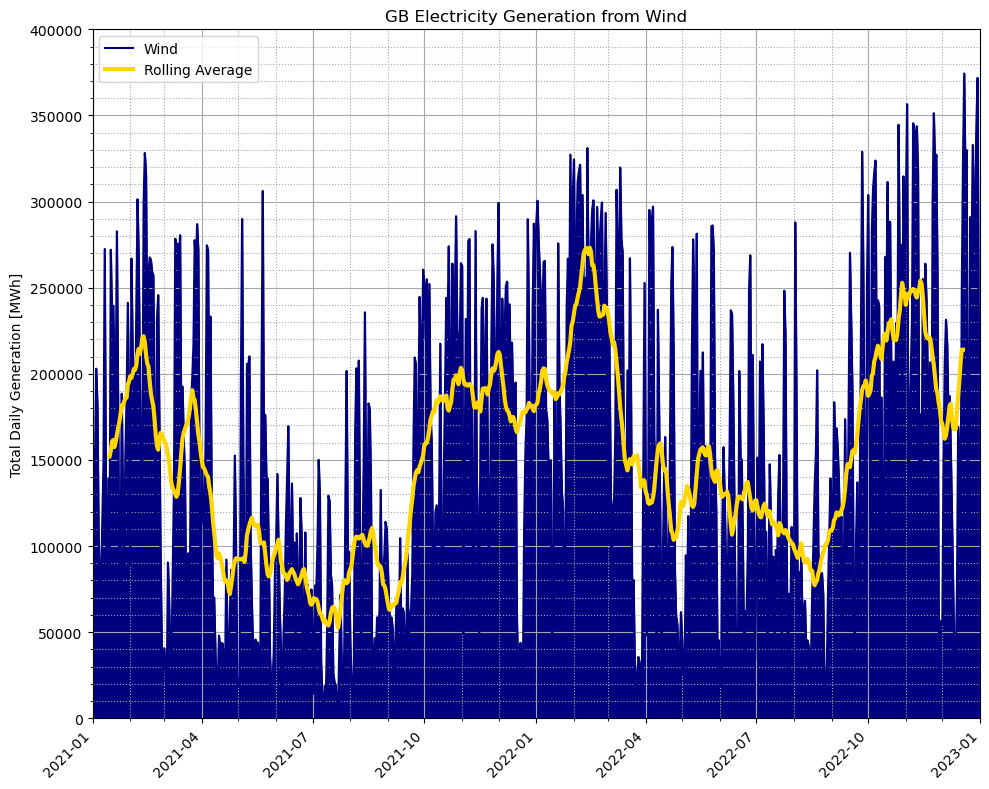

In [96]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title("GB Electricity Generation from Wind")
plt.ylabel('Total Daily Generation [MWh]')

ax.plot(GBGen["Date"], GBGen["Wind [MWh]"], color="navy", label="Wind")
#ax.plot(GBGen["Date"], GBGen["PSH [MWh]"], label="PSH")
#ax.plot(GBGen["Date"], GBGen["Hydro [MWh]"], label="PSH")
ax.plot(GBGen["Date"], GBGen["Wind [MWh]"].rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="Rolling Average")
#ax.plot(ImportData["Date"], Mean, label="RMS", color='black')


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0, 400000)
plt.tight_layout()

plt.fill_between(GBGen["Date"], GBGen["Wind [MWh]"], color="navy")

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

In [97]:
%store -r BZGB

GBGen["GB Electricity DA [EUR/MWh]"] = BZGB["BZN|GB"]

NewOrder = ["Date", "GB Electricity DA [EUR/MWh]", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]"]
#GBGen = pd.DataFrame(GBGen)

GBGen = GBGen.reindex(columns=NewOrder)


print(GBGen.to_string())

          Date GB Electricity DA [EUR/MWh]  Wind [MWh]  PSH [MWh]  Hydro [MWh]
0   2021-01-01                        68.4    100321.0     2955.0      10248.0
1   2021-01-02                       71.54     89471.0     4057.0       9726.0
2   2021-01-03                       65.27    149102.5     3466.0       9276.0
3   2021-01-04                       67.32    202998.0     2902.0       9196.5
4   2021-01-05                        67.4    182120.0     6524.0       9286.5
5   2021-01-06                      160.07    104660.5    12538.0      13172.0
6   2021-01-07                      101.79     81997.0    11260.0      14499.0
7   2021-01-08                      115.46     77380.0    10580.0      11560.5
8   2021-01-09                       74.13    111653.5     3897.0       8336.5
9   2021-01-10                       76.47    148918.5     3318.0      10176.0
10  2021-01-11                       71.51    272527.5     5800.0      12006.0
11  2021-01-12                      126.26    130903

In [98]:
print(max(GBGen["Wind [MWh]"]))

374393.5


[-9.68595661e-07  5.21795555e+00]
5.217955548887069


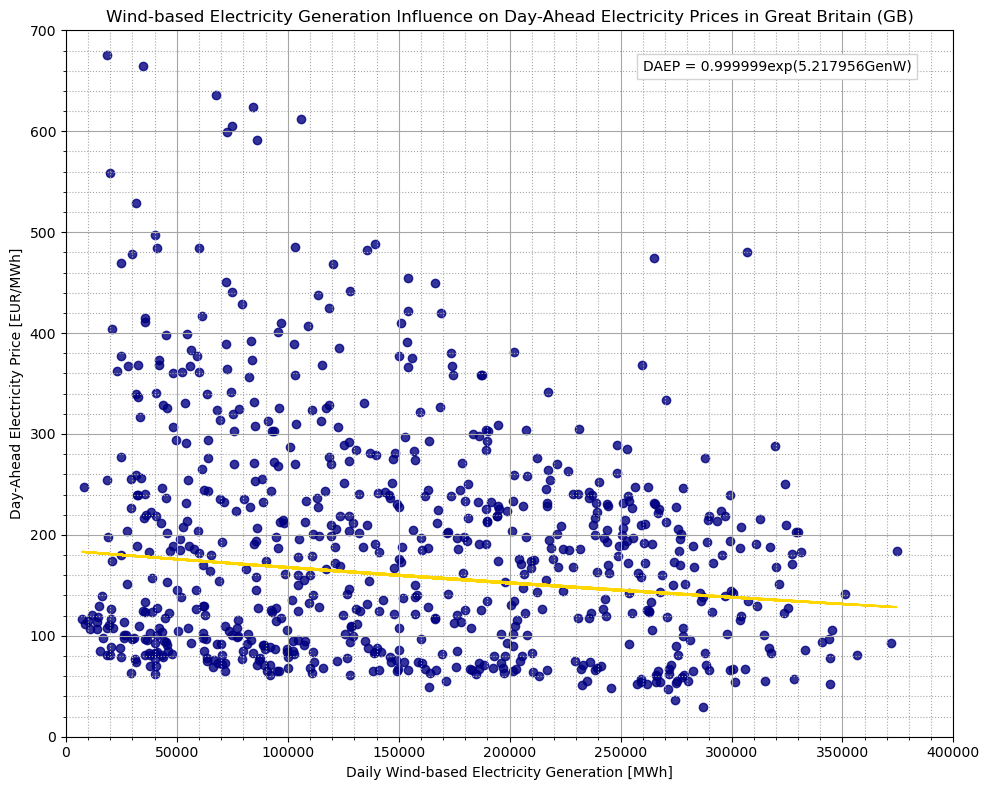

In [105]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import scipy

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

#ax.scatter(GBGen["Wind [MWh]"], GBGen["GB Electricity DA [EUR/MWh]"], color = "navy")

sns.regplot(x=GBGen["Wind [MWh]"].astype(float), 
            y=GBGen["GB Electricity DA [EUR/MWh]"].astype(float), 
            scatter = True, ci = 100, fit_reg = False,
            scatter_kws = {"color": "navy"}, line_kws = {"color": "gold"}, order=1)

#slope, intercept, r, GBGen, sterr = scipy.stats.linregress(x=GBGen["Wind [MWh]"].astype(float),
#                                                       y=GBGen["GB Electricity DA [EUR/MWh]"].astype(float))

#plt.text(5500, 660, 'DAEP = ' + str(round(slope,3)) + '×GenW + ' + str(round(intercept,3)))

def format_e(n):
    a = '%E' % n
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]

x_data = np.array(GBGen["Wind [MWh]"]).astype(float)
y_data = np.array(GBGen["GB Electricity DA [EUR/MWh]"]).astype(float)

log_y_data = np.log(y_data)

curve_fit = np.polyfit(x_data, log_y_data, 1)
print(curve_fit)
print(curve_fit[1])

ycurve = np.exp(curve_fit[1])*np.exp(curve_fit[0]*x_data)

plt.plot(x_data, ycurve, color="gold")

A = round(math.e**curve_fit[0], 6)
B = round(curve_fit[1], 6)

plt.text(260000, 660, 'DAEP = ' + str(A) + 'exp(' + str(B) + 'GenW)',
         bbox=dict(facecolor='white', edgecolor='lightgrey'))

#plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

plt.title('Wind-based Electricity Generation Influence on Day-Ahead Electricity Prices in Great Britain (GB)')
plt.xlabel('Daily Wind-based Electricity Generation [MWh]')
plt.ylabel('Day-Ahead Electricity Price [EUR/MWh]')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

#fig.autofmt_xdate()

#plt.tick_params(axis='x', which='major', labelsize=10)
#plt.xticks(rotation=45, ha='right')
plt.xlim(0, 400000)
plt.ylim(0, 700)
plt.tight_layout()

#ax.xaxis.set_minor_locator(mdates.MonthLocator())
#ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()